In [169]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import string
from keras.preprocessing.text import Tokenizer

In [170]:
#import data and add header row

toxic = pd.read_csv("toxic/train.csv")

#let's work with just 5000 examples

toxic = toxic[0:10000]
toxic.shape


(10000, 8)

In [214]:
#lowercase text and removing punctuation in title to have smaller size of model in future

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    s = s.replace('\n', ' ')
    return s

toxic['comment_text'] = [normalize(s) for s in toxic['comment_text']]

X = toxic["comment_text"].values 
y = toxic[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
print(X[2986])
print(y[2986])


youre a real problem radiopathy you would do well to let the others jump to their own illinformed conclusions and we can sit back and watch hilarity ensue instead you interpret lexi’s explanation for these idiots and cut off what would have provided a mild form of entertainment for weeks to come a plague and pox on you and your farm animals and a double plague on lexi for failing to make sure in advance that you would play along or if he did contact you and get your agreement in advance a triple plague and pox upon him for believing you when you have so quickly shown instead that are intelligence and intuitivelexvacpac3
[0 0 0 0 0 0]


In [50]:
#https://keras.io/preprocessing/text/
#need to tokenize text first
max_words = 20000
tokenizer = Tokenizer(num_words=max_words, char_level=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',)
tokenizer.fit_on_texts(X) 
tokenized_X = tokenizer.texts_to_matrix(X, mode='freq')

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=20000)
#term frequency count(word)/total words
tokenized_X = tfidf_vect.fit_transform(X)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(tokenized_X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(7000, 20000)
(3000, 20000)


c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


ï


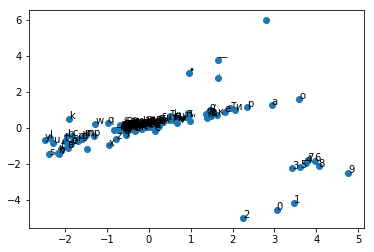

In [91]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot



model = Word2Vec(X, min_count=5)
X_text = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X_text)

#create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
print(words[5])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [174]:
# building a model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


model = Sequential()
model.add(Dense(1000, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(500, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='sigmoid'))


In [175]:
# tune optimizer, increase/decrease learning rate depending on the loss in prev.tests (e.g. to make model train faster)
from keras.optimizers import Adam
#lr increased from the default value
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [176]:
model.compile(loss='binary_crossentropy',
              optimizer=adam, metrics=['accuracy'])

In [177]:
history = model.fit(X_train, y_train, epochs=3, batch_size=300, validation_data=(X_test, y_test))

Train on 7000 samples, validate on 3000 samples
Epoch 1/3
7000/7000 [==============================] - 16s 2ms/step - loss: 0.1615 - acc: 0.9469 - val_loss: 0.0877 - val_acc: 0.9643
Epoch 2/3
7000/7000 [==============================] - 14s 2ms/step - loss: 0.0653 - acc: 0.9671 - val_loss: 0.0852 - val_acc: 0.9736
Epoch 3/3
7000/7000 [==============================] - 14s 2ms/step - loss: 0.0404 - acc: 0.9852 - val_loss: 0.0996 - val_acc: 0.9756


In [178]:
# evaluate model

scores = model.evaluate(X_test, y_test)
print(scores)

3000/3000 [==============================] - 3s 865us/step
[0.09955102541049321, 0.9756110967000325]


In [179]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3000/3000 [==============================] - 3s 902us/step

acc: 97.56%


In [244]:
# check prediction on individual examples

# k = np.array(X_test)
# true_label = np.array(y_test)
#prediction = model.predict_classes(X_test)
#print(true_label)
#print(prediction[5:12])

predictions = model.predict(X_test)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0
value = 1
x_one = []

for x in predictions[0:100]:
    if value in x:
        x_one.append(x)
        print(np.where(x == 1))
print(x_one)


        #print("text message: {} ,\n true labels: {},\n pred labels: {}".format(X, y, predictions))


(array([0, 2, 4], dtype=int64),)
(array([0, 2, 4], dtype=int64),)
(array([0, 2, 4], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0, 2, 4], dtype=int64),)
(array([0, 2, 4], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
[array([1., 0., 1., 0., 1., 0.], dtype=float32), array([1., 0., 1., 0., 1., 0.], dtype=float32), array([1., 0., 1., 0., 1., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 1., 0., 1., 0.], dtype=float32), array([1., 0., 1., 0., 1., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0.], dtype=float32)]
[]


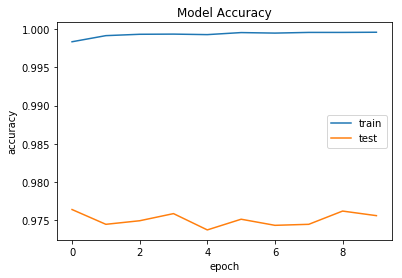

In [126]:
# plot accuracy
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

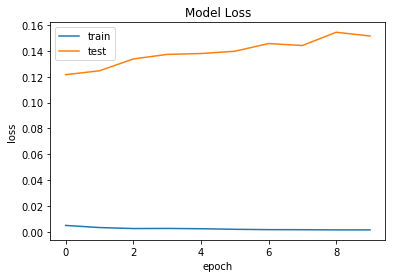

In [127]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()